# Conceitos avançados em MatplotLib

Nesta palestra, abordamos alguns tópicos mais avançados que você normalmente não usará com tanta frequência. Sempre que tiver dúvidas, consulte esse Notebook.

#### Escala logarítmica

Também é possível definir uma escala logarítmica para um ou ambos os eixos. Essa funcionalidade é, de fato, apenas uma aplicação de um sistema de transformação mais geral no Matplotlib. Cada uma das escalas dos eixos é definida separadamente usando os métodos `set_xscale` e` set_yscale` que aceitam um parâmetro (com o valor "log" neste caso):

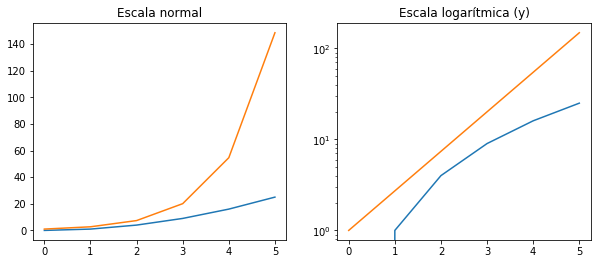

In [41]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(0, 6, 1)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Escala normal")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Escala logarítmica (y)");

### Colocação de labels personalizados

Podemos determinar explicitamente onde queremos os ticks do eixo com `set_xticks` e` set_yticks`, que devem receber uma lista de valores para onde no eixo os tiques devem ser colocados. Também podemos usar os métodos `set_xticklabels` e` set_yticklabels` para fornecer uma lista de rótulos de texto personalizados para cada local do tick:

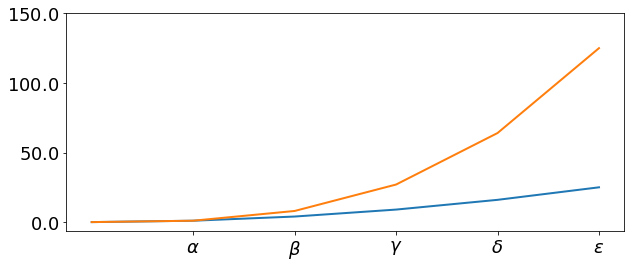

In [14]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18);

Há uma série de métodos mais avançados para controlar a colocação de tiques maiores e menores em figuras matplotlib, como posicionamento automático de acordo com políticas diferentes. Veja http://matplotlib.org/api/ticker_api.html para obter detalhes.

#### Notação científica

Com grandes números em eixos, muitas vezes é melhor usar notação científica:

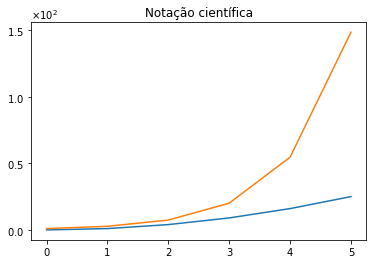

In [17]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("Notação científica")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

### Número do eixo e espaçamento das etiquetas dos eixos

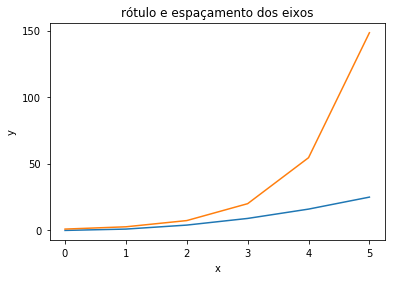

In [22]:
# distância entre os eixos x e y e os números nos eixos
matplotlib.rcParams['xtick.major.pad'] = 5
matplotlib.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("rótulo e espaçamento dos eixos")

# preenchimento entre rótulo de eixo e números de eixo
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

In [23]:
# Redefine os padrões
matplotlib.rcParams['xtick.major.pad'] = 3
matplotlib.rcParams['ytick.major.pad'] = 3

#### Ajustes da posição do eixo

Infelizmente, ao salvar figuras, as etiquetas são às vezes recortadas, e pode ser necessário ajustar um pouco as posições dos eixos. Isso pode ser feito usando `subplots_adjust`:

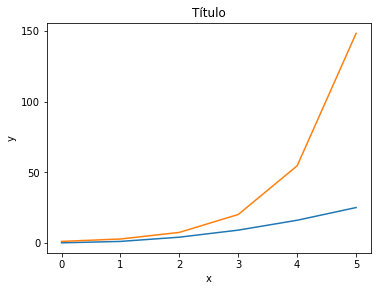

In [24]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("Título")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### Grade do eixo

Com o método `grid` do objeto do eixo, podemos ligar e desligar as linhas da grade. Também podemos personalizar a aparência das linhas de grade usando os mesmos argumentos de palavras-chave que a função `plot`:

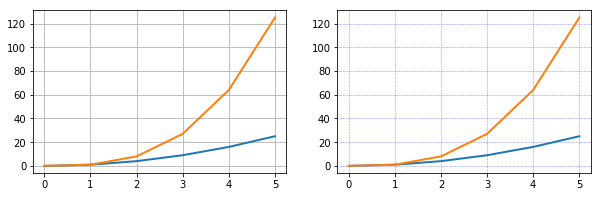

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# Aparência padrão das linhas
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# Aparência customizada
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Limites dos eixos

Também podemos alterar as propriedades dos limites dos eixos:

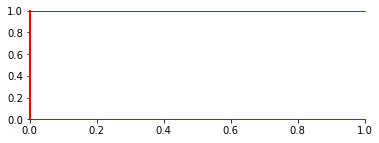

In [26]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# Desliga os limites da direita
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # Apenas labels no lado esquerdo

### Eixos gêmeos

Às vezes, é útil ter eixos duplos x ou y em uma figura; por exemplo, ao traçar curvas com diferentes unidades juntas. O Matplotlib é compatível com as funções `twinx` e` twiny`:

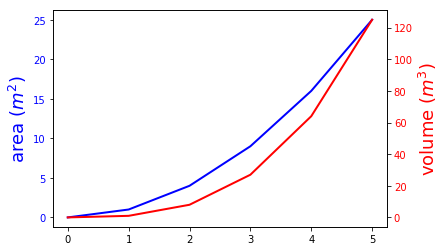

In [27]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Eixos onde x e y são zero

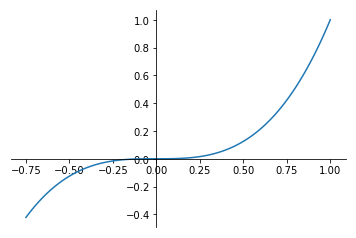

In [29]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) 

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3)

### Outros estilos de plots 2D

Além do método regular `plot`, há uma série de outras funções para gerar diferentes tipos de plots. Veja a galeria completa de estilos do matplotlib em: http://matplotlib.org/gallery.html. Alguns dos mais úteis são os seguintes:

In [30]:
n = np.array([0,1,2,3,4,5])

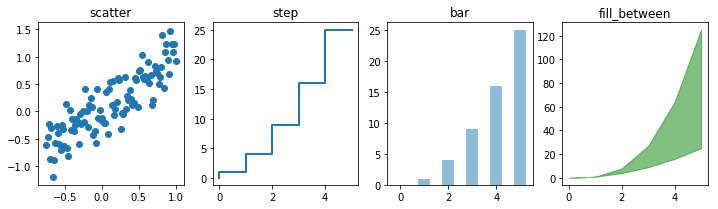

In [31]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

### Anotações

Anotar texto em figuras matplotlib pode ser feito usando a função `text`. Ele suporta formatação LaTeX, assim como textos e títulos de rótulos de eixos:

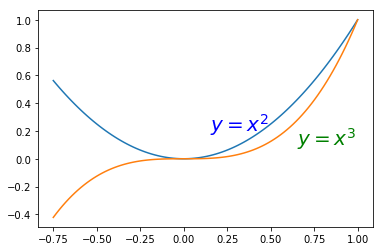

In [32]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### Figuras com multiplos plots

Os eixos podem ser adicionados a uma tela de tela matplotlib manualmente usando `fig.add_axes` ou usando um gerenciador de layout de sub-figura, como` subplots`, `subplot2grid` ou` gridspec`:

#### subplots

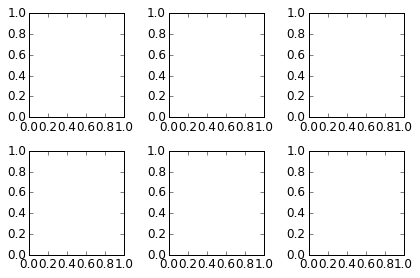

In [109]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

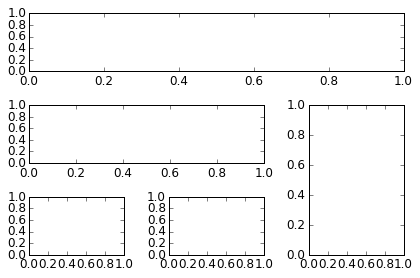

In [110]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

In [111]:
import matplotlib.gridspec as gridspec

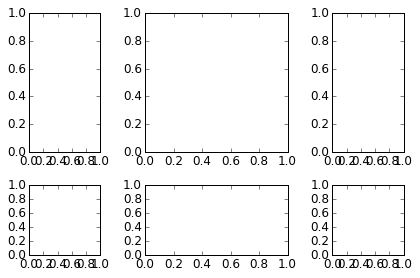

In [112]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### add_axes

A adição manual de eixos com `add_axes` é útil para adicionar figuras internas à outras:

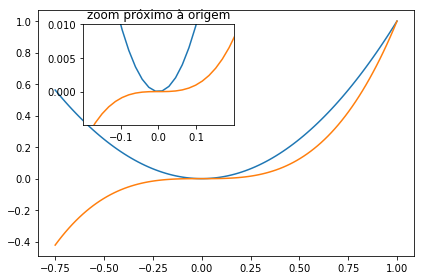

In [34]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inserir
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, largura, altura

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom próximo à origem')

# definir o alcance do eixo
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# define posição dos ticks do eixo
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

### Colormap e superfícies de contorno

Colormaps e superfícies de contorno são úteis para traçar funções de duas variáveis. Na maioria dessas funções, usaremos um mapa de cores para codificar uma dimensão dos dados. Há uma série de colormaps predefinidos. É relativamente simples definir cores personalizadas. Para obter uma lista de colormaps pré-definidos, consulte: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [35]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [36]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

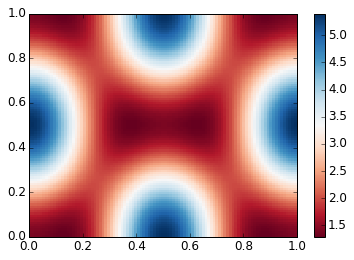

In [116]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### imshow

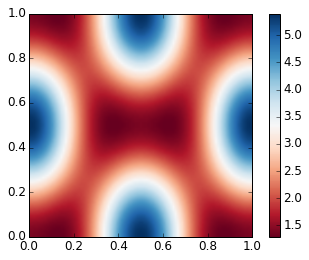

In [117]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

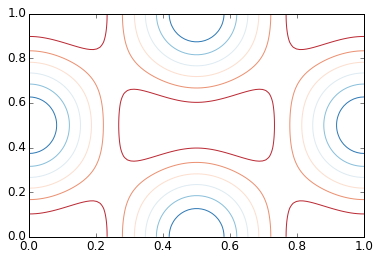

In [118]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## Figuras 3D

Para usar gráficos 3D no matplotlib, primeiro precisamos criar uma instância da classe `Axes3D`. Os eixos 3D podem ser adicionados a uma tela de tela matplotlib exatamente da mesma maneira que os eixos 2D; ou, mais convenientemente, passando um argumento de palavra-chave `projection = '3d'` para os métodos` add_axes` ou `add_subplot`.

In [37]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Plots de superficie

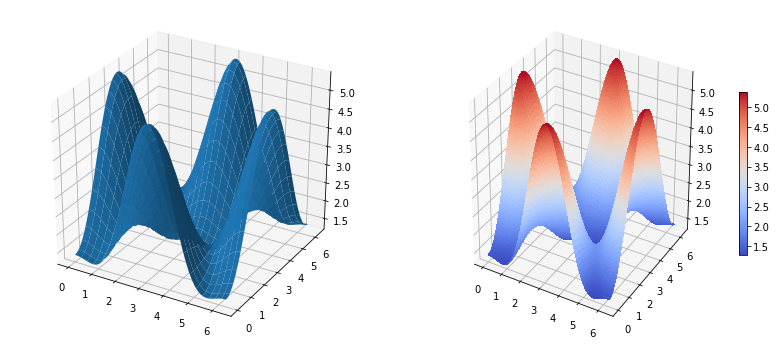

In [40]:
fig = plt.figure(figsize=(14,6))

# `ax` é uma instância de eixo com reconhecimento 3D devido ao argumento de palavra-chave projection = '3d' para add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot com classificação de cores e barra de cores
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#### Plot "Wire-frame"

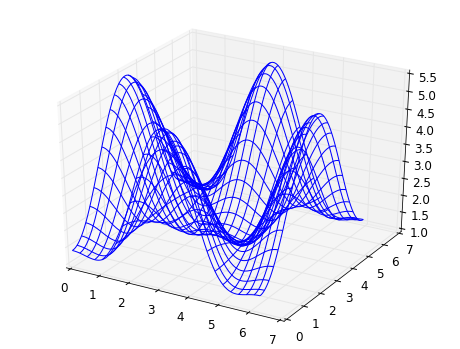

In [122]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#### Superfície de contorno com projeções

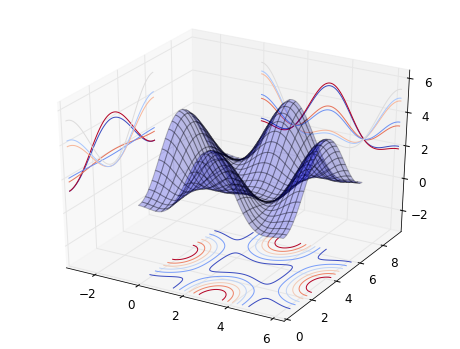

In [123]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

## Leituras adicionais

* http://www.matplotlib.org - A página web do projeto matplotlib.
* https://github.com/matplotlib/matplotlib - O código-fonte do matplotlib.
* http://matplotlib.org/gallery.html - Uma grande galeria mostrando diversos tipos de gráficos que Matplotlib pode criar. Altamente recomendado!
* http://www.loria.fr/~rougier/teaching/matplotlib - Um excelente tutorial de matplotlib
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Outra excelente referência para matplotlib.